In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_s = 101

## Part 1:

a. From the Dataset repository load (cluster_mpg.csv)
b. Will use random_state = 101 where applicable

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/cluster_mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


1. Which column can be safely remove from the dataset? Write the answer on your paper

In [ ]:
df = df.drop('name', axis=1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,usa
388,44.0,4,97.0,52.0,2130,24.6,82,europe
389,32.0,4,135.0,84.0,2295,11.6,82,usa
390,28.0,4,120.0,79.0,2625,18.6,82,usa


In [ ]:
df = pd.get_dummies(df, columns=['origin'], drop_first=False).astype('float')
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,0.0,0.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,0.0,0.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,0.0,0.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,0.0,0.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,0.0,0.0,1.0


2. What is the scaled value of data or index 85 after scaling in terms of displacement?

Perform a Principal Component Analysis on the scaled data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.copy()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


displacement_scaled_value = scaled_data[85][1]
print("The Scaled value of displacement for index 85:", displacement_scaled_value)

pca = PCA()
principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data = principalComponents)
print(principalDf)

The Scaled value of displacement for index 85: 1.483947024779763
            0         1         2         3         4         5         6  \
0    2.801005  0.320339  0.656663 -0.518870 -0.738652  0.766243 -0.476786   
1    3.584368  0.369645  0.964884 -0.282461 -0.588088  0.495804  0.004389   
2    3.099742  0.307663  0.944898 -0.251333 -0.963157  0.735577 -0.220338   
3    3.049356  0.367393  0.793047 -0.490174 -0.709139  0.540139 -0.237422   
4    3.037469  0.322174  0.968737 -0.272668 -1.099928  0.590524 -0.477794   
..        ...       ...       ...       ...       ...       ...       ...   
387 -0.884229 -1.007914 -1.428527  0.754989 -0.609240 -0.634403  0.190549   
388 -4.345385  1.261627 -2.119235  0.856935  1.875910  1.368908  0.642127   
389 -1.025157 -1.170108 -0.798797  1.471920 -1.911669 -0.243352 -0.042747   
390 -1.421509 -0.978214 -1.958631  0.232262 -0.028262 -0.450172  0.305504   
391 -1.566072 -1.022377 -2.093284  0.231636  0.153507 -0.153211  0.584601   

          

# 3. What is the explained variance of PC0?

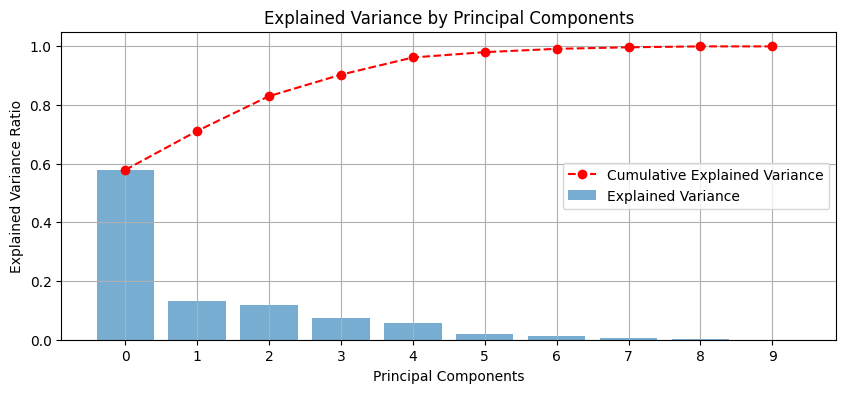

In [ ]:

plt.figure(figsize=(10, 4))


plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', label = 'Cumulative Explained Variance', color = 'red')


plt.bar(range(0, len(explained_variance)), explained_variance, alpha = 0.6, label='Explained Variance')

plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(0, len(explained_variance)))
plt.grid(True)
plt.legend(loc = 'center right')
plt.show()

In [ ]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance of PC0:", explained_variance[0])

Explained Variance of PC0: 0.5788575314058662


# 4. What is the total explained variance of PC0 and PC1?

In [ ]:
total_explained_variance = explained_variance[0] + explained_variance[1]
print("Total Explained Variance of PC0 and PC1:", total_explained_variance)

Total Explained Variance of PC0 and PC1: 0.7118300241528728


# 5. What is the total explained variance of PC0, PC1 and PC2?

In [ ]:
total_explained_variance_3pcs = explained_variance[0] + explained_variance[1] + explained_variance[2]
print("Total Explained Variance of PC0, PC1 and PC2:", total_explained_variance_3pcs)

Total Explained Variance of PC0, PC1 and PC2: 0.8303350791192141


# 6. Using only two principal components, what is the value of PC0 and PC1 at index 285?

In [ ]:
print(principalDf.iloc[285][0], principalDf.iloc[285][1])

2.7456413189807485 -0.6541014878447338


# 7. Using three principal components, what is the value of PC0, PC1, and PC2 at index 300?

In [ ]:
print(principalDf.iloc[300][0], principalDf.iloc[300][1], principalDf.iloc[300][2])

-1.6016079686808165 -0.8263315855241968 -1.1454320362883155


# 8. Perform a KMeans Clustering, what is the optimal number of K based on PC0 and PC1?

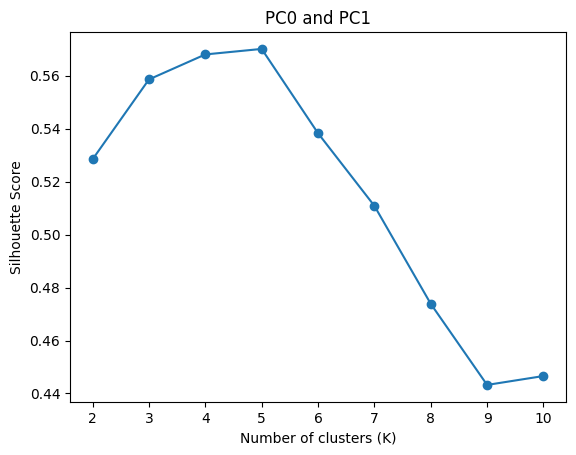

Optimal number of clusters (K): 5


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_kmeans = principalDf[[0, 1]]

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_s)
    cluster_labels = kmeans.fit_predict(X_kmeans)
    silhouette_avg = silhouette_score(X_kmeans, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('PC0 and PC1')
plt.show()

optimal_k = np.argmax(silhouette_scores) + 2
print("Optimal number of clusters (K):", optimal_k)

# 9. Perform a DBSCAN Clustering. Based on testing what is the optimal epsilon score based on the graph alone?

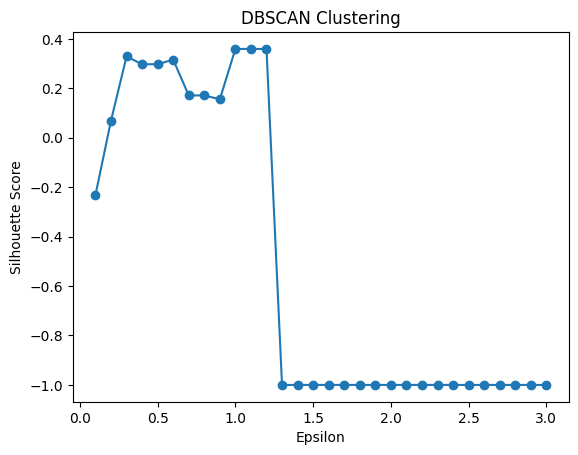

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X_dbscan = principalDf[[0, 1]]

eps_values = np.arange(0.1, 3.1, 0.1)
silhouette_scores_dbscan = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    cluster_labels = dbscan.fit_predict(X_dbscan)

    if len(set(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(X_dbscan, cluster_labels)
        silhouette_scores_dbscan.append(silhouette_avg)
    else:
        silhouette_scores_dbscan.append(-1)

plt.plot(eps_values, silhouette_scores_dbscan, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
dbscan = DBSCAN(eps=1.0, min_samples=5)
cluster_labels = dbscan.fit_predict(X_dbscan)


# 10. What are you recommending as the min_samples value?

#11.How many outliers can the DBSCAN detect based on the optimal epsilon score and the recommended min_samples?

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

X = principalDf[[0, 1]]

epsilon = 0.37
min_samples = 4

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

outliers_count = np.sum(clusters == -1)

print("Number of outliers detected by DBSCAN:", outliers_count)

Number of outliers detected by DBSCAN: 6


a. Visualize the x = PC0 and y = PC1, Show Data 200 with marker of star (*) using 2D scatter plot

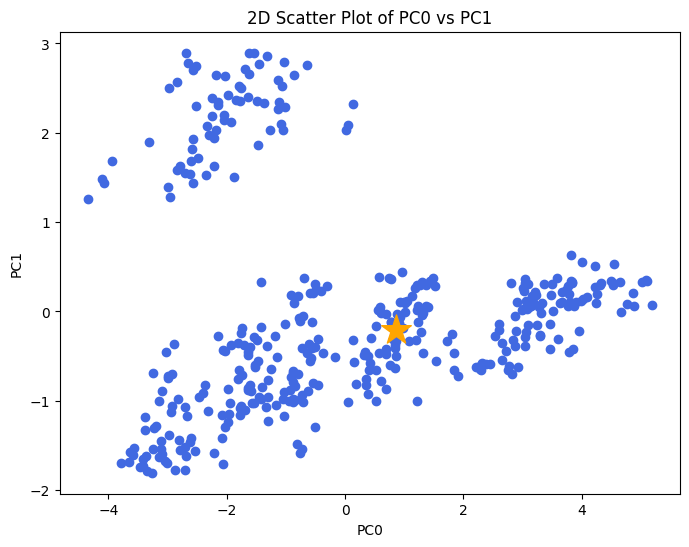

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(principalDf[0], principalDf[1], color='royalblue')
plt.scatter(principalDf.iloc[200][0], principalDf.iloc[200][1], marker='*', s=500, color='orange')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('2D Scatter Plot of PC0 vs PC1')
plt.show()

b. Visualize the x = PC0, y = PC1, and z = PC2, Show or Trace Data 200 with black circle, using scatter_3D.

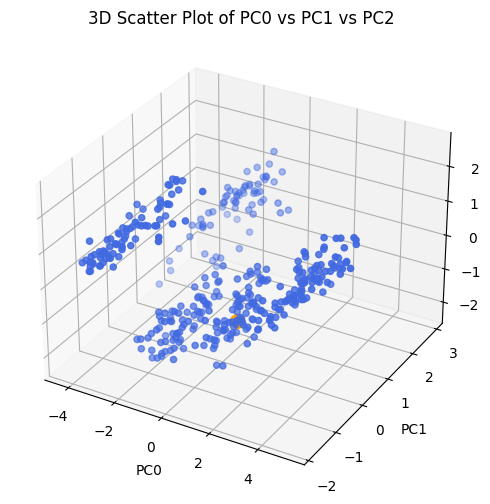

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principalDf[0], principalDf[1], principalDf[2], color='royalblue')
ax.scatter(principalDf.iloc[200][0], principalDf.iloc[200][1], principalDf.iloc[200][2], marker='o', s=100, color='orange')
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
ax.set_title('3D Scatter Plot of PC0 vs PC1 vs PC2')
plt.show()